In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy import signal
from astropy.io import fits
rng = np.random.default_rng()

In [ ]:
#necesitamos solo las columnas time, rate y rate_err
def plot_light_curvet90(filename,tstart,tstop):
   with fits.open(filename) as hdul:
      information = hdul[1].data
      header1 = hdul[1].header
      T_0=header1['TRIGTIME']
      time=information['TIME']
      rate=information['RATE']
      rate_err=information['ERROR']
      time=time-T_0

      #time=time-(T_0-0.1*T90)

   #creamos nuevos arreglos
   tiempo=[]
   rate2=[]
   rate2_err=[]
   for i in range(0,len(time)):
     if(time[i]>=tstart and time[i]<=tstop):
        tiempo.append(time[i])
        rate2.append(rate[i])
        rate2_err.append(rate_err[i])
   return tiempo,rate2,rate2_err

In [ ]:
#Escribimos la ubicación de nuestros archivos .lc para abrirlos
ruta1= '/content/15150.lc'
ruta2= '/content/drive/MyDrive/LighCurves/07A128msec3cha.lc'

In [ ]:
#Extraemos la info que nos interesa
time,rate,rate_err=plot_light_curvet90(ruta1,-0.256,0.64)

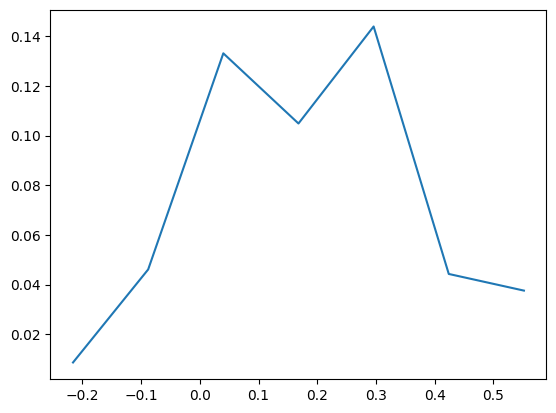

In [ ]:
#Graficamos las curvas de luz en las 2 bandas
#Desde la de menor energía hasta la da mayor
plt.plot(time,rate)

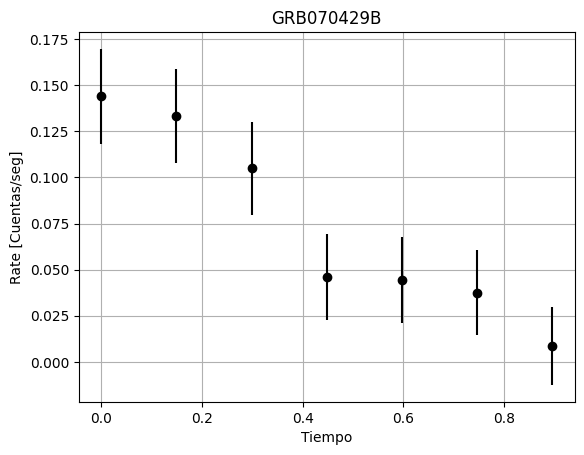

In [ ]:
# Crear el DataFrame
data = pd.DataFrame({'time': time, 'rate': rate, 'rate_err': rate_err})

# Hacer 0 todos los rates negativos
data['rate'] = data['rate'].apply(lambda x: max(x, 0))

# Ordenar por la columna 'rate'
data_sorted = data.sort_values(by='rate', ascending=False)

# Crear la nueva columna de tiempo ajustado
data_sorted['adjusted_time'] = np.linspace(0, 0.896, len(data_sorted))

# Graficar los datos con el tiempo ajustado
plt.errorbar(data_sorted['adjusted_time'], data_sorted['rate'], yerr=data_sorted['rate_err'], fmt='o', color='black')
plt.xlabel('Tiempo')
plt.ylabel('Rate [Cuentas/seg]')
plt.title('GRB070429B')
plt.grid(True)
plt.savefig('GRB070429Bordered.pdf')
plt.show()

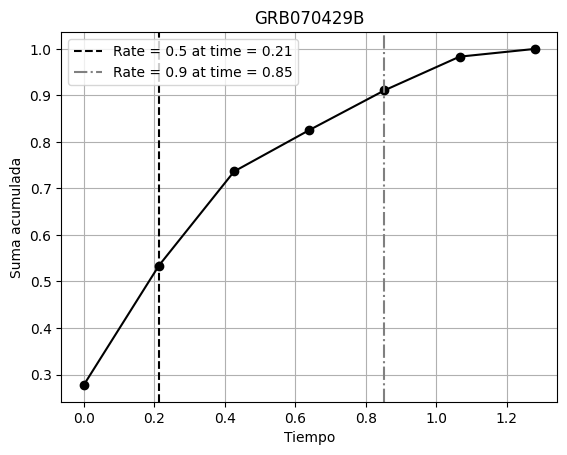

In [ ]:
# Crear el DataFrame
data = pd.DataFrame({'time': time, 'rate': rate, 'rate_err': rate_err})

# Hacer 0 todos los rates negativos
data['rate'] = data['rate'].apply(lambda x: max(x, 0))

# Ordenar por la columna 'rate'
data_sorted = data.sort_values(by='rate', ascending=False)

# Crear la nueva columna de tiempo ajustado
data_sorted['adjusted_time'] = np.linspace(0, 1.28, len(data_sorted))

# Calcular la suma acumulativa de 'rate'
data_sorted['cumulative_rate'] = data_sorted['rate'].cumsum()

# Encontrar el tiempo donde rate es 0.5 y 0.9
time_at_05 = data_sorted.loc[data_sorted['cumulative_rate']/data_sorted['cumulative_rate'].iloc[-1] >= 0.5, 'adjusted_time'].iloc[0]
time_at_09 = data_sorted.loc[data_sorted['cumulative_rate']/data_sorted['cumulative_rate'].iloc[-1] >= 0.9, 'adjusted_time'].iloc[0]

# Graficar la CDF con líneas verticales en los puntos encontrados
plt.plot(data_sorted['adjusted_time'], data_sorted['cumulative_rate']/data_sorted['cumulative_rate'].iloc[-1], marker='o', color='black')

plt.axvline(x=time_at_05, color='black', linestyle='--', label=f'Rate = 0.5 at time = {time_at_05:.2f}')
plt.axvline(x=time_at_09, color='gray', linestyle='-.', label=f'Rate = 0.9 at time = {time_at_09:.2f}')

plt.xlabel('Tiempo')
plt.ylabel('Suma acumulada')
plt.title('GRB070429B')
plt.grid(True)
plt.legend()
plt.savefig('GRB070429Bsumaacu.pdf')
plt.show()


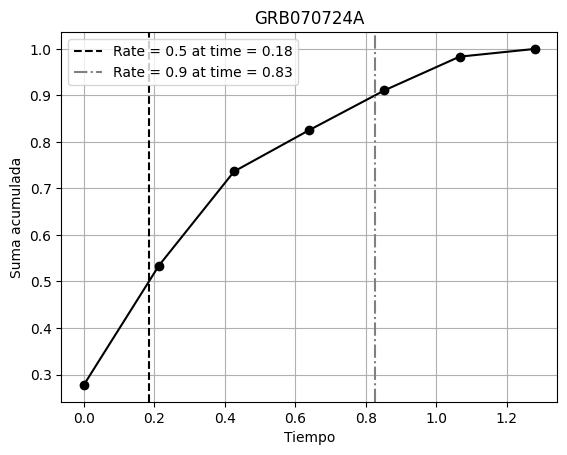

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear el DataFrame
data = pd.DataFrame({'time': time, 'rate': rate, 'rate_err': rate_err})

# Hacer 0 todos los rates negativos
data['rate'] = data['rate'].apply(lambda x: max(x, 0))

# Ordenar por la columna 'rate'
data_sorted = data.sort_values(by='rate', ascending=False)

# Crear la nueva columna de tiempo ajustado
data_sorted['adjusted_time'] = np.linspace(0, 1.28, len(data_sorted))

# Calcular la suma acumulativa de 'rate'
data_sorted['cumulative_rate'] = data_sorted['rate'].cumsum()

# Encontrar el tiempo donde rate es 0.5 y 0.9
# Calcular el tiempo exacto para el rate 0.5
total_rate = data_sorted['cumulative_rate'].iloc[-1]
idx_05 = np.argmax(data_sorted['cumulative_rate'] >= 0.5 * total_rate)

if idx_05 > 0:
    prev_rate = data_sorted['cumulative_rate'].iloc[idx_05 - 1]
    frac = (0.5 * total_rate - prev_rate) / (data_sorted['cumulative_rate'].iloc[idx_05] - prev_rate)
    time_at_05 = data_sorted['adjusted_time'].iloc[idx_05 - 1] + frac * (data_sorted['adjusted_time'].iloc[idx_05] - data_sorted['adjusted_time'].iloc[idx_05 - 1])
else:
    time_at_05 = data_sorted['adjusted_time'].iloc[0]

# Calcular el tiempo exacto para el rate 0.9 de manera similar si lo necesitas
idx_09 = np.argmax(data_sorted['cumulative_rate'] >= 0.9 * total_rate)

if idx_05 > 0:
    prev_rate = data_sorted['cumulative_rate'].iloc[idx_09 - 1]
    frac = (0.9 * total_rate - prev_rate) / (data_sorted['cumulative_rate'].iloc[idx_09] - prev_rate)
    time_at_09 = data_sorted['adjusted_time'].iloc[idx_09 - 1] + frac * (data_sorted['adjusted_time'].iloc[idx_09] - data_sorted['adjusted_time'].iloc[idx_09 - 1])
else:
    time_at_05 = data_sorted['adjusted_time'].iloc[0]
# Graficar la CDF con líneas verticales en los puntos encontrados
plt.plot(data_sorted['adjusted_time'], data_sorted['cumulative_rate']/total_rate, marker='o', color='black')

plt.axvline(x=time_at_05, color='black', linestyle='--', label=f'Rate = 0.5 at time = {time_at_05:.2f}')
plt.axvline(x=time_at_09, color='gray', linestyle='-.', label=f'Rate = 0.9 at time = {time_at_09:.2f}')

plt.xlabel('Tiempo')
plt.ylabel('Suma acumulada')
plt.title('GRB070724A')
plt.grid(True)
plt.legend()
plt.savefig('GRB070724Asumaacu.pdf')
plt.show()